In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-2, 2)

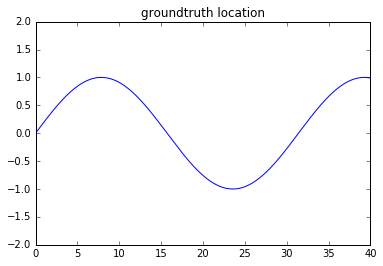

In [7]:
NUM_POINTS = 500
NUM_TIME = 40

time = np.linspace(0, NUM_TIME, NUM_POINTS) 
realpos = np.sin(time/5) # refers to groundtruth location

plt.plot(time, realpos)
plt.title('groundtruth location')
plt.ylim(-2, 2)

In [8]:
def takeMeasurement(realpos):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = .15
    z = np.random.normal(realpos, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .05
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [9]:
processNoise = 0.1;
measurementNoise = 0.1;

estimated_position = [] # list of best-guess estimates

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []

for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
    
    # track best guess estimates
    estimated_position.append(x)

(0, 40)

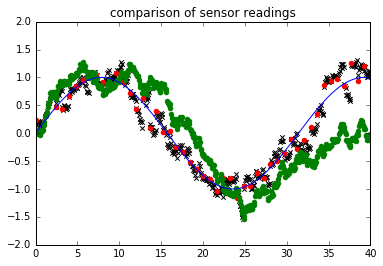

In [12]:
plt.plot(time, realpos, color = 'b') # groundtruth
plt.scatter(time, estimated_position, color = 'k', marker = 'x') # best guess
plt.scatter(measurement_time, unfilterMeasurements, color = 'r') # measurements
plt.scatter(time, unfilterOdometry, color = 'g') # odometer
plt.title('comparison of sensor readings')
plt.ylim(-2, 2)
plt.xlim(0, 40)